# Exercise 2 - Coregistration of LIDAR and RADAR

In [1]:
%matplotlib notebook

In [2]:
!wget https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/radar_bandep.png
!wget https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/lidar_georef.png
  
  


--2022-01-13 11:42:05--  https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/radar_bandep.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7657532 (7,3M) [application/octet-stream]
Saving to: ‘radar_bandep.png’

radar_bandep.png    100%[===================>]   7,30M  1,47MB/s    in 42s     

2022-01-13 11:42:49 (179 KB/s) - ‘radar_bandep.png’ saved [7657532/7657532]

--2022-01-13 11:42:49--  https://raw.githubusercontent.com/aplyer/gefolki/master/datasets/lidar_georef.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

<IPython.core.display.Javascript object>


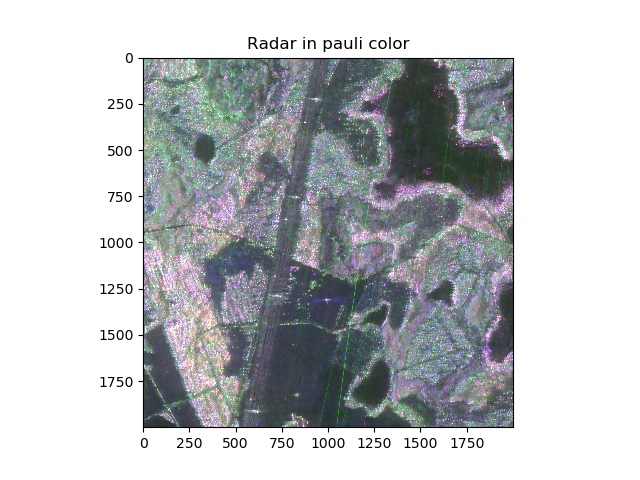

<IPython.core.display.Javascript object>


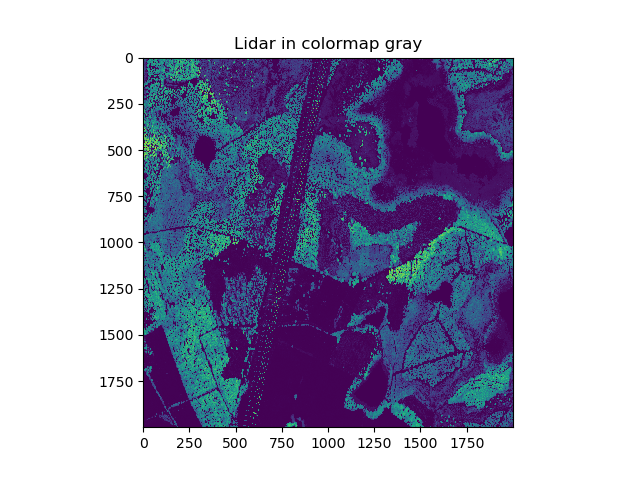

In [3]:
import numpy as np
from skimage.io import imread
import pylab as pl

radar = imread("radar_bandep.png")
Ilidari = imread("lidar_georef.png")

pl.figure()
pl.imshow(radar)
pl.title('Radar in pauli color')

pl.figure()
pl.imshow(Ilidari)
pl.title('Lidar in colormap gray')

Iradar = radar[:, :, 0]
Iradar = Iradar.astype(np.float32)/255
Ilidar = Ilidari.astype(np.float32)/255

In [5]:
#!git clone https://github.com/aplyer/gefolki.git
  
import sys
sys.path.append('gefolki/python')
from algorithm import EFolki

<IPython.core.display.Javascript object>


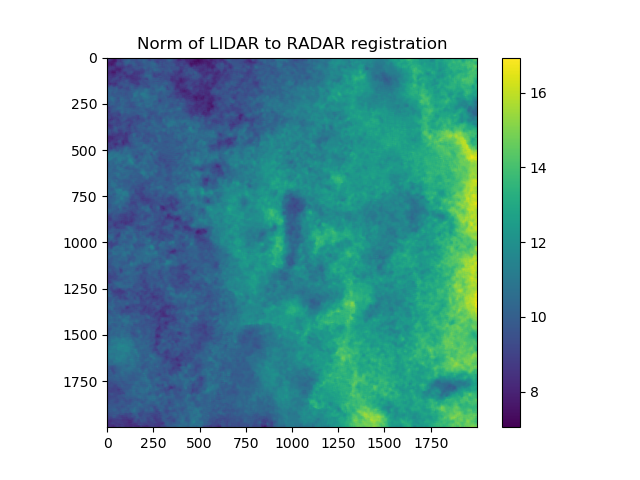

In [6]:
u, v = EFolki(Iradar, Ilidar, iteration=2, radius=[32, 24, 16, 8], rank=4, levels=5)
N = np.sqrt(u**2+v**2)
pl.figure()
pl.imshow(N)
pl.title('Norm of LIDAR to RADAR registration')
pl.colorbar()



<IPython.core.display.Javascript object>


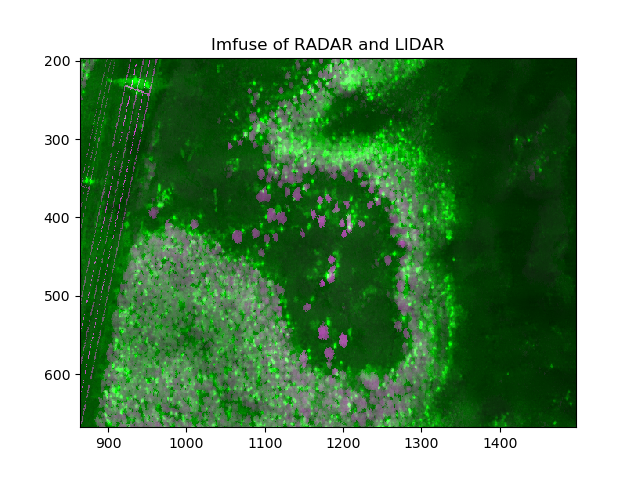

<IPython.core.display.Javascript object>


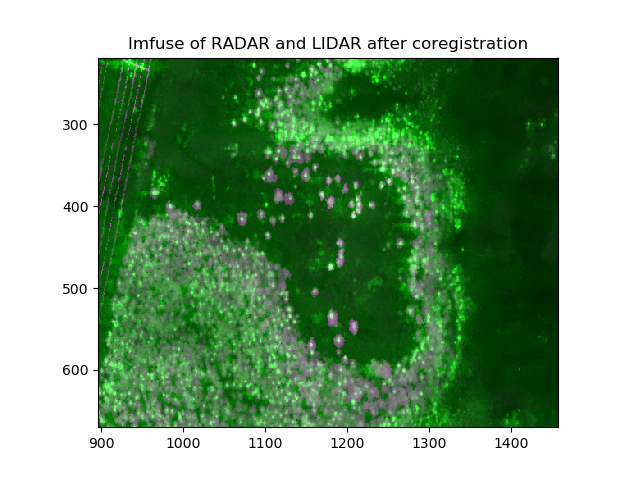

Text(0.5, 1.0, 'Imfuse of RADAR and LIDAR after coregistration')

In [8]:
from tools import wrapData
Ilidar_resampled = wrapData(Ilidar, u, v)

C = np.dstack((Ilidar, Iradar, Ilidar))
pl.figure()
pl.imshow(C)
pl.title('Imfuse of RADAR and LIDAR')

D = np.dstack((Ilidar_resampled, Iradar, Ilidar_resampled))
pl.figure()
pl.imshow(D)
pl.title('Imfuse of RADAR and LIDAR after coregistration')